In [26]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import sys 
!{sys.executable} -m pip install heartpy
import heartpy as hp

In [27]:
RearrangedData = { 'ppg' : [] , 'diff1ppg' : [] , 'diff2ppg' : [] , 'abp' : []}
AttributeTable = { 'systolicIndex': [] , 'systolicValue': [] , 'hr': [] , 'valleyIndex0': [] , 'valleyValue0': [] , 'maxSlopeIndex': [] }
AttributeTable['maxSlopeIndex'] = []
AttributeTable['maxSlopeValue'] = []
AttributeTable['minSlopeIndex'] = []
AttributeTable['minSlopeValue'] = []
AttributeTable['peakValue1st'] = []
AttributeTable['valleyValue1st'] = []
AttributeTable['DicroticIndex'] = []
AttributeTable['DicroticValue'] = []
AttributeTable['peaIndex2st'] = []
AttributeTable['peakValue2st'] = []
AttributeTable['valleyIndex2st'] = []
AttributeTable['valleyValue2st'] = []
AttributeTable['DicroticDiff2Value'] = []
RearrangedData['SamplingRate'] = 125.0
AttributeTable['onsetIndex1st'] = []
AttributeTable['onsetValue1st'] = []
AttributeTable['onsetIndex2nd'] = []
AttributeTable['onsetValue2nd'] = []

In [28]:
RawData1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_1.mat' )
RawData3 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_3.mat' )
RawData4 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_4.mat' )

In [29]:
print( RawData1['Part_1'].shape )
print( RawData3['Part_3'].shape )
print( RawData4['Part_4'].shape )

(1, 3000)
(1, 3000)
(1, 3000)


In [30]:
print( RawData1['Part_1'][0][0].shape )
print( RawData1['Part_1'][0][5].shape )

(3, 61000)
(3, 21000)


In [31]:
for i in range( len(RawData1['Part_1'][0][0:20]) ):
    #Low pass filter
    N = len(RawData1['Part_1'][0][i][0])
    t = np.linspace( 0 , N , N )
    F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
    yf = np.fft.fft( RawData1['Part_1'][0][i][0] )
    yf = np.fft.fftshift( yf )
    for i in range( N ):
        if ( F[i] > 8 ) | ( F[i] < -8 ):
            yf[i] = 0
    iyf = np.abs( np.fft.ifft( yf ) )

    #Nomarlization
    iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
    RearrangedData['ppg'].append( iyf )

#RearrangedData['ppg'] = np.array( RearrangedData['ppg'] )


for i in range( len(RawData1['Part_1'][0][0:20]) ):
    RearrangedData['abp'].append( RawData1['Part_1'][0][i][1] )





'''for i in range( len(RawData3['Part_3'][0]) ):
    #Low pass filter
    N = len(RawData3['Part_3'][0][i][0])
    t = np.linspace( 0 , N , N )
    F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
    yf = np.fft.fft( RawData3['Part_3'][0][i][0] )
    yf = np.fft.fftshift( yf )
    for i in range( N ):
        if ( F[i] > 8 ) | ( F[i] < -8 ):
            yf[i] = 0
    iyf = np.abs( np.fft.ifft( yf ) )

    #Nomarlization
    iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
    RearrangedData['ppg'].append( iyf )




for i in range( len(RawData3['Part_3'][0]) ):
    RearrangedData['abp'].append( RawData3['Part_3'][0][i][1] )




for i in range( len(RawData4['Part_4'][0]) ):
    #Low pass filter
    N = len(RawData4['Part_4'][0][i][0])
    t = np.linspace( 0 , N , N )
    F = t*RearrangedData['SamplingRate']/N - RearrangedData['SamplingRate']/2
    yf = np.fft.fft( RawData4['Part_4'][0][i][0] )
    yf = np.fft.fftshift( yf )
    for i in range( N ):
        if ( F[i] > 8 ) | ( F[i] < -8 ):
            yf[i] = 0
    iyf = np.abs( np.fft.ifft( yf ) )

    #Nomarlization
    iyf = ( iyf - np.min(iyf) ) / ( max(iyf) - min(iyf) )
    RearrangedData['ppg'].append( iyf )




for i in range( len(RawData4['Part_4'][0]) ):
    RearrangedData['abp'].append( RawData4['Part_4'][0][i][1] )
'''



for i in range( len(RearrangedData['ppg']) ):
    diff1 = []
    diff2 = []
    #Get and Filter 1st derivative ppg
    for j in range( 1 , len(RearrangedData['ppg'][i]) , 1 ):
        diff1.append( RearrangedData['ppg'][i][j] - RearrangedData['ppg'][i][j-1] )

    for k in range( 1 , len(diff1) , 1 ):
        diff2.append( diff1[k] - diff1[k-1] )

    diff1 = np.array( diff1 )
    diff2 = np.array( diff2 )
    RearrangedData['diff1ppg'].append( diff1 )
    RearrangedData['diff2ppg'].append( diff2 )



In [32]:
for i in range( len(RearrangedData['ppg']) ):
    #get peak index of ppg
    #temp = []
    working_data, measures = hp.process(RearrangedData['ppg'][i], 125.0)
    AttributeTable['systolicIndex'].append( np.setdiff1d( working_data['peaklist'] , working_data['removed_beats'] ) )
    temp = []
    for j in range( len(AttributeTable['systolicIndex'][i]) ):
        temp.append( RearrangedData['ppg'][i][AttributeTable['systolicIndex'][i][j]] ) 
    temp = np.array( temp )
    AttributeTable['systolicValue'].append(temp)

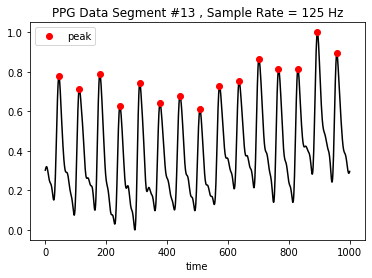

In [33]:
y = 12
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t , Test , color = 'black' )
plt.plot( AttributeTable['systolicIndex'][y] , AttributeTable['systolicValue'][y]  , 'o' , color = 'red' , label = 'peak' )
plt.xlabel( 'time' )
plt.title( 'PPG Data Segment #13 , Sample Rate = 125 Hz' )
plt.legend( loc = 'best' )
plt.show()

In [34]:
for x in range( len(AttributeTable['systolicIndex']) ):

    #Find the valleyIndex0 and valleyValue0
    minIndex = []
    minList = []
    for i in range( 1 , len(AttributeTable['systolicIndex'][x]) , 1 ):
        tempIndex = 0
        tempMin = 3
        for j in range( AttributeTable['systolicIndex'][x][i-1] ,  AttributeTable['systolicIndex'][x][i] , 1 ):
            if RearrangedData['ppg'][x][j] < tempMin:
                tempIndex = j
                tempMin = RearrangedData['ppg'][x][j]
        minIndex.append( tempIndex )
        minList.append( tempMin )
    minIndex = np.array( minIndex )
    minList = np.array( minList )
    AttributeTable['valleyIndex0'].append( minIndex )
    AttributeTable['valleyValue0'].append( minList )

    #Get hr 
    temphr = []
    for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
        temphr.append( 60*125 / ( AttributeTable['valleyIndex0'][x][i] - AttributeTable['valleyIndex0'][x][i-1] ) )
    temphr = np.array( temphr )
    AttributeTable['hr'].append( temphr ) 

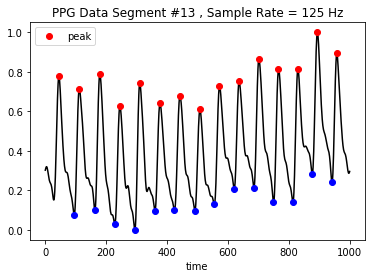

In [35]:
y = 12
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t , Test , color = 'black' )
plt.plot( AttributeTable['systolicIndex'][y] , AttributeTable['systolicValue'][y]  , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['valleyIndex0'][y] , AttributeTable['valleyValue0'][y]  , 'o' , color = 'blue' )
plt.xlabel( 'time' )
plt.title( 'PPG Data Segment #13 , Sample Rate = 125 Hz' )
plt.legend( loc = 'best' )
plt.show()

In [36]:
for x in range( len(AttributeTable['valleyIndex0']) ):
    maxSlopeIndexList = []
    maxSlopeValueList = []
    minSlopeIndexList = []
    minSlopeValueList = []
    peakValue1stList = []
    valleyValue1stList = []
    DicroticIndexList = []
    DicroticValueList = []
    peakIndex2stList = []
    peakValue2stList = []
    valleyIndex2stList = []
    valleyValue2stList = []
    
    
    for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
        maxSlope = -100
        maxSlopeIndex = 0
        minSlope = 100
        minSlopeIndex = 0
        
        peakvalue2st = -100
        peakindex2st = 0
        valleyvalue2st = 100
        valleyindex2st = 0
        
        for j in range( AttributeTable['valleyIndex0'][x][i-1] , AttributeTable['valleyIndex0'][x][i] , 1 ):
            if RearrangedData['diff1ppg'][x][j] > maxSlope:
                maxSlope = RearrangedData['diff1ppg'][x][j]
                maxSlopeIndex = j 
            if RearrangedData['diff2ppg'][x][j] > peakvalue2st:
                peakvalue2st = RearrangedData['diff2ppg'][x][j]
                peakindex2st = j
            if RearrangedData['diff2ppg'][x][j] < valleyvalue2st:
                valleyvalue2st = RearrangedData['diff2ppg'][x][j]
                valleyindex2st = j
            
            
            
        for j in range( AttributeTable['systolicIndex'][x][i] , int((AttributeTable['valleyIndex0'][x][i] + AttributeTable['systolicIndex'][x][i])/2) , 1 ):
            if RearrangedData['diff1ppg'][x][j] < minSlope:
                minSlope = RearrangedData['diff1ppg'][x][j]
                minSlopeIndex = j 
        maxSlopeIndexList.append( maxSlopeIndex )
        maxSlopeValueList.append( RearrangedData['ppg'][x][maxSlopeIndex] )
        minSlopeIndexList.append( minSlopeIndex )
        minSlopeValueList.append( RearrangedData['ppg'][x][minSlopeIndex] )
        peakValue1stList.append( maxSlope )
        valleyValue1stList.append( minSlope )
        peakIndex2stList.append( peakindex2st )
        peakValue2stList.append( peakvalue2st )
        valleyIndex2stList.append( valleyindex2st )
        valleyValue2stList.append( valleyvalue2st )
        
        


        maxdiff2 = -100
        maxdiff2Index = 0
        for k in range( minSlopeIndexList[i-1] , AttributeTable['valleyIndex0'][x][i] , 1 ):
            if RearrangedData['diff2ppg'][x][k-5] > maxdiff2:
                maxdiff2 = RearrangedData['diff2ppg'][x][k-5]
                maxdiff2Index = k 
        DicroticIndexList.append( maxdiff2Index )
        DicroticValueList.append( RearrangedData['ppg'][x][maxdiff2Index] )
        
        
        

            



    maxSlopeIndexList = np.array( maxSlopeIndexList )
    maxSlopeValueList = np.array( maxSlopeValueList )
    minSlopeIndexList = np.array( minSlopeIndexList )
    minSlopeValueList = np.array( minSlopeValueList )
    peakValue1stList = np.array( peakValue1stList )
    valleyValue1stList = np.array( valleyValue1stList )
    DicroticIndexList = np.array( DicroticIndexList )
    DicroticValueList = np.array( DicroticValueList )
    peakIndex2stList = np.array( peakIndex2stList )
    peakValue2stList = np.array( peakValue2stList )
    valleyIndex2stList = np.array( valleyIndex2stList )
    valleyValue2stList = np.array( valleyValue2stList )

    AttributeTable['maxSlopeIndex'].append( maxSlopeIndexList )
    AttributeTable['maxSlopeValue'].append( maxSlopeValueList )
    AttributeTable['minSlopeIndex'].append( minSlopeIndexList )
    AttributeTable['minSlopeValue'].append( minSlopeValueList )
    AttributeTable['peakValue1st'].append( peakValue1stList )
    AttributeTable['valleyValue1st'].append( valleyValue1stList )
    AttributeTable['DicroticIndex'].append( DicroticIndexList )
    AttributeTable['DicroticValue'].append( DicroticValueList )
    AttributeTable['peaIndex2st'].append( peakIndex2stList )
    AttributeTable['peakValue2st'].append( peakValue2stList )
    AttributeTable['valleyIndex2st'].append( valleyIndex2stList )
    AttributeTable['valleyValue2st'].append( valleyValue2stList )

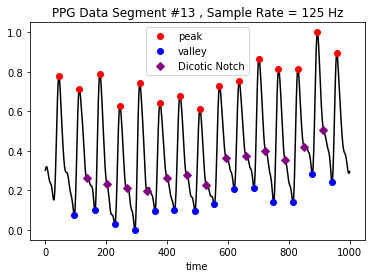

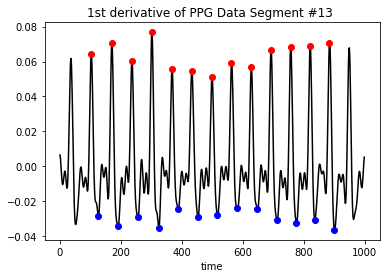

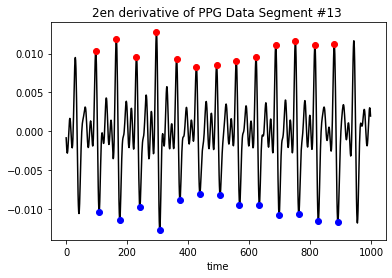

In [41]:
y = 12
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t , Test , color = 'black' )
plt.plot( AttributeTable['systolicIndex'][y] , AttributeTable['systolicValue'][y]  , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['valleyIndex0'][y] , AttributeTable['valleyValue0'][y]  , 'o' , color = 'blue' , label = 'valley' )
plt.plot( AttributeTable['DicroticIndex'][y] , AttributeTable['DicroticValue'][y] , 'D' , color = 'purple' , label = 'Dicotic Notch' )
plt.xlabel( 'time' )
plt.title( 'PPG Data Segment #13 , Sample Rate = 125 Hz' )
plt.legend( loc = 'best' )
plt.show()


Test1 = RearrangedData['diff1ppg'][y]
t1 = np.linspace( 0 , len(Test1) , len(Test1) )

plt.plot( t1 , Test1  , color = 'black' )
plt.plot( AttributeTable['maxSlopeIndex'][y] , AttributeTable['peakValue1st'][y] , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['minSlopeIndex'][y] , AttributeTable['valleyValue1st'][y] , 'o'  , color = 'blue' , label = 'valley')
plt.xlabel( 'time' )
plt.title( '1st derivative of PPG Data Segment #13 ' )
plt.show()


Test2 = RearrangedData['diff2ppg'][y]
t2 = np.linspace( 0 , len(Test2) , len(Test2) )

plt.plot( t2 , Test2 , color = 'black' )
plt.plot( AttributeTable['peaIndex2st'][y] , AttributeTable['peakValue2st'][y] , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['valleyIndex2st'][y] , AttributeTable['valleyValue2st'][y] , 'o' , color = 'blue' , label = 'valley')
plt.xlabel( 'time' )
plt.title( '2en derivative of PPG Data Segment #13 ' )
plt.show()

In [42]:
AttributeTable['dbp'] = []
AttributeTable['sbp'] = []

In [43]:
for x in range( len(AttributeTable['valleyIndex0']) ):

    minList = []
    maxList = []
    for i in range( 1 , len( AttributeTable['valleyIndex0'][x] ) , 1 ):
        max = -100
        min = 100
        start = AttributeTable['valleyIndex0'][x][i-1]
        end = AttributeTable['valleyIndex0'][x][i]
        for j in range( start , end , 1 ):
            if RearrangedData['abp'][x][j] > max:
                max = RearrangedData['abp'][x][j]
            if RearrangedData['abp'][x][j] < min:
                min = RearrangedData['abp'][x][j]
        minList.append( min )
        maxList.append( max )
    minList = np.array( minList )
    maxList = np.array( maxList )
    AttributeTable['dbp'].append( minList )
    AttributeTable['sbp'].append( maxList )

In [44]:
for x in range( len(AttributeTable['maxSlopeIndex']) ):


    onsetIndexList1st = []
    onsetValueList1st = []
    for i in range( 1 , len( AttributeTable['maxSlopeIndex'][x] ) , 1 ):

        onsetIndex = 0
        onsetValue = 0
        j = AttributeTable['maxSlopeIndex'][x][i] - 1
        while j > AttributeTable['DicroticIndex'][x][i-1]:
            slope1_r = RearrangedData['diff1ppg'][x][j+2] - RearrangedData['diff1ppg'][x][j]
            slope1_l = RearrangedData['diff1ppg'][x][j] - RearrangedData['diff1ppg'][x][j-2]
            #slope2_r = RearrangedData['diff1ppg'][x][j+1] - RearrangedData['diff1ppg'][x][j-1]
            #slope2_l = RearrangedData['diff1ppg'][x][j-1] - RearrangedData['diff1ppg'][x][j-3]

            if ( slope1_r > 0 ) and ( slope1_l < 0 ):# and ( slope2_r > 0 ) and ( slope2_l < 0 ):
                #if RearrangedData['diff1ppg'][x][j] < RearrangedData['diff1ppg'][x][j+1]:
                onsetIndex = j 
                onsetValue = RearrangedData['diff1ppg'][x][j]
                #else: 
                break
            j = j - 1
        onsetIndexList1st.append( onsetIndex )
        onsetValueList1st.append( onsetValue )


    onsetIndexList2nd = []
    onsetValueList2nd = []
    for i in range( 1 , len( AttributeTable['peaIndex2st'][x] ) , 1 ):

        onsetIndex = 0
        onsetValue = 0
        j = AttributeTable['peaIndex2st'][x][i] - 1
        while j >= AttributeTable['DicroticIndex'][x][i-1]:
            slope1_r = RearrangedData['diff2ppg'][x][j+2] - RearrangedData['diff2ppg'][x][j]
            slope1_l = RearrangedData['diff2ppg'][x][j] - RearrangedData['diff2ppg'][x][j-2]
            #slope2_r = RearrangedData['diff2ppg'][x][j+1] - RearrangedData['diff2ppg'][x][j-1]
            #slope2_l = RearrangedData['diff2ppg'][x][j-1] - RearrangedData['diff2ppg'][x][j-3]

            if ( slope1_r > 0 ) and ( slope1_l < 0 ): #and ( slope2_r > 0 ) and ( slope2_l < 0 ):
                #if RearrangedData['diff2ppg'][x][j] < RearrangedData['diff2ppg'][x][j+1]:
                onsetIndex = j 
                onsetValue = RearrangedData['diff2ppg'][x][j]
                #else: 
                break
            j = j - 1
        onsetIndexList2nd.append( onsetIndex )
        onsetValueList2nd.append( onsetValue )




    onsetIndexList1st = np.array( onsetIndexList1st )
    onsetValueList1st = np.array( onsetValueList1st )
    onsetIndexList2nd = np.array( onsetIndexList2nd )
    onsetValueList2nd = np.array( onsetValueList2nd )

    AttributeTable['onsetIndex1st'].append( onsetIndexList1st )
    AttributeTable['onsetValue1st'].append( onsetValueList1st )
    AttributeTable['onsetIndex2nd'].append( onsetIndexList2nd )
    AttributeTable['onsetValue2nd'].append( onsetValueList2nd )

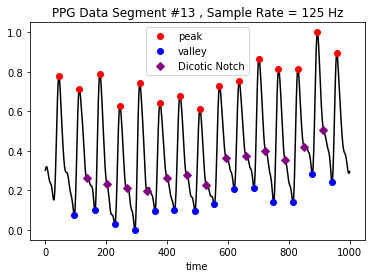

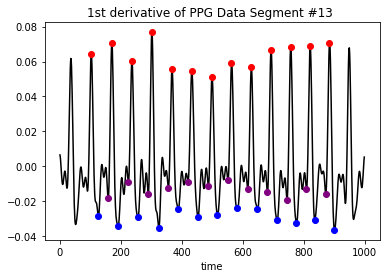

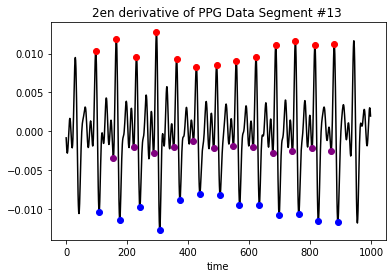

In [48]:
y = 12
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t , Test , color = 'black' )
plt.plot( AttributeTable['systolicIndex'][y] , AttributeTable['systolicValue'][y]  , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['valleyIndex0'][y] , AttributeTable['valleyValue0'][y]  , 'o' , color = 'blue' , label = 'valley' )
plt.plot( AttributeTable['DicroticIndex'][y] , AttributeTable['DicroticValue'][y] , 'D' , color = 'purple' , label = 'Dicotic Notch' )
plt.xlabel( 'time' )
plt.title( 'PPG Data Segment #13 , Sample Rate = 125 Hz' )
plt.legend( loc = 'best' )
plt.show()


Test1 = RearrangedData['diff1ppg'][y]
t1 = np.linspace( 0 , len(Test1) , len(Test1) )

plt.plot( t1 , Test1  , color = 'black' )
plt.plot( AttributeTable['maxSlopeIndex'][y] , AttributeTable['peakValue1st'][y] , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['minSlopeIndex'][y] , AttributeTable['valleyValue1st'][y] , 'o'  , color = 'blue' , label = 'valley')
plt.plot( AttributeTable['onsetIndex1st'][y] , AttributeTable['onsetValue1st'][y] , 'o' , color = 'purple' )
plt.xlabel( 'time' )
plt.title( '1st derivative of PPG Data Segment #13 ' )
plt.show()


Test2 = RearrangedData['diff2ppg'][y]
t2 = np.linspace( 0 , len(Test2) , len(Test2) )

plt.plot( t2 , Test2 , color = 'black' )
plt.plot( AttributeTable['peaIndex2st'][y] , AttributeTable['peakValue2st'][y] , 'o' , color = 'red' , label = 'peak' )
plt.plot( AttributeTable['valleyIndex2st'][y] , AttributeTable['valleyValue2st'][y] , 'o' , color = 'blue' , label = 'valley')
plt.plot( AttributeTable['onsetIndex2nd'][y] , AttributeTable['onsetValue2nd'][y] , 'o' , color = 'purple' )
plt.xlabel( 'time' )
plt.title( '2en derivative of PPG Data Segment #13 ' )
plt.show()

In [ ]:
ppg = RearrangedData['ppg']
ppg = np.array( ppg )
abp = RearrangedData['abp']
abp = np.array( abp )
diff1 = RearrangedData['diff1ppg']
diff1 = np.array( diff1 )
diff2 = RearrangedData['diff2ppg']
diff2 = np.array( diff2 )
peakIndex = AttributeTable['systolicIndex']
peakIndex = np.array( peakIndex )
peakValue = AttributeTable['systolicValue']
peakValue = np.array( peakValue )
valleyIndex = AttributeTable['valleyIndex0']
valleyIndex = np.array( valleyIndex )
valleyValue = AttributeTable['valleyValue0']
valleyValue = np.array( valleyValue )
hr = AttributeTable['hr']
hr = np.array( hr )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/ppg.npy' , ppg  ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/abp.npy' , abp ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/diff1.npy' , diff1 ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/diff2.npy' , diff2 ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/peakIndex.npy' , peakIndex ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/peakValue.npy' , peakValue ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/valleyIndex.npy' , valleyIndex ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/valleyValue.npy' , valleyValue ) 
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/hr.npy' , hr ) 
dbp = AttributeTable['dbp']
sbp = AttributeTable['sbp'] 
onsetIndex1st = AttributeTable['onsetIndex1st']
onsetValue1st = AttributeTable['onsetValue1st'] 
onsetIndex2nd = AttributeTable['onsetIndex2nd']
onsetValue2nd = AttributeTable['onsetValue2nd']
dbp = np.array(dbp)
sbp = np.array(sbp)
onsetIndex1st = np.array(onsetIndex1st)
onsetValue1st = np.array(onsetValue1st)
onsetIndex2nd = np.array(onsetIndex2nd)
onsetValue2nd = np.array(onsetValue2nd)
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/dbp.npy' , dbp )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/sbp.npy' , sbp )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/onsetIndex1st.npy' , onsetIndex1st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/onsetValue1st.npy' , onsetValue1st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/onsetIndex2nd.npy' , onsetIndex2nd )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/onsetValue2nd.npy' , onsetValue2nd )
maxSlopeIndex = AttributeTable['maxSlopeIndex']
maxSlopeValue = AttributeTable['maxSlopeValue'] 
minSlopeIndex = AttributeTable['minSlopeIndex'] 
minSlopeValue = AttributeTable['minSlopeValue'] 
peakValue1st = AttributeTable['peakValue1st'] 
valleyValue1st = AttributeTable['valleyValue1st'] 
DicroticIndex = AttributeTable['DicroticIndex'] 
DicroticValue = AttributeTable['DicroticValue'] 
peaIndex2st = AttributeTable['peaIndex2st'] 
peakValue2st = AttributeTable['peakValue2st'] 
valleyIndex2st = AttributeTable['valleyIndex2st'] 
valleyValue2st = AttributeTable['valleyValue2st']  
DicroticDiff2Value = AttributeTable['DicroticDiff2Value']
maxSlopeIndex = np.array( maxSlopeIndex )
maxSlopeValue = np.array( maxSlopeValue )
minSlopeIndex = np.array( minSlopeIndex )
minSlopeValue = np.array( minSlopeValue )
peakValue1st = np.array( peakValue1st )
valleyValue1st = np.array( valleyValue1st )
DicroticIndex = np.array( DicroticIndex )
DicroticValue = np.array( DicroticValue )
peaIndex2st = np.array( peaIndex2st )
peakValue2st = np.array( peakValue2st )
valleyIndex2st = np.array( valleyIndex2st )
valleyValue2st = np.array( valleyValue2st )
DicroticDiff2Value = np.array( DicroticDiff2Value )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/maxSlopeIndex.npy' , maxSlopeIndex )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/maxSlopeValue.npy' , maxSlopeValue )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/minSlopeIndex.npy' , minSlopeIndex )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/minSlopeValue.npy' , minSlopeValue )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/peakValue1st.npy' , peakValue1st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/valleyValue1st.npy' , valleyValue1st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/DicroticIndex.npy' , DicroticIndex )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/DicroticValue.npy' , DicroticValue )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/peaIndex2st.npy' , peaIndex2st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/peakValue2st.npy' , peakValue2st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/valleyIndex2st.npy' , valleyIndex2st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/valleyValue2st.npy' , valleyValue2st )
np.save( '/data1/Yan-Cheng-Hsu/ppgData/f8_normalizedppg/DicroticDiff2Value.npy' , DicroticDiff2Value )


In [43]:
Features = []
BP = []

In [44]:
for x in range( len(AttributeTable['valleyIndex0']) ):
    featuresofp = []
    bpofp = []

    #extremely abnormal patient
    avghr = np.mean( AttributeTable['hr'][x] )
    if ( avghr > 200 ) or ( avghr < 30 ):
        continue

    for i in range( 2 , len(AttributeTable['valleyIndex0'][x]) - 1 , 1 ):
        temp = []
        bp = []
        avghr = np.mean( AttributeTable['hr'][x] )
        hr = AttributeTable['hr'][x][i-1]
        sbp = AttributeTable['sbp'][x][i-1]
        dbp = AttributeTable['dbp'][x][i-1]
        pm = sbp - dbp
        DO = AttributeTable['valleyIndex0'][x][i] - AttributeTable['DicroticIndex'][x][i-1]

        if ( hr > (1.3*avghr) ) or ( hr < (avghr/1.3) ) or ( hr > 200 ) or ( hr < 20 ) or ( sbp > 300) or ( dbp < 20 ) or ( pm < 30 ) or ( pm > 200 ) or ( DO < 5 ):
            continue

        else:
            #ppg Index
            I1 = AttributeTable['valleyIndex0'][x][i-1]
            I2 = AttributeTable['maxSlopeIndex'][x][i-1]
            I3 = AttributeTable['systolicIndex'][x][i]
            I4 = AttributeTable['DicroticIndex'][x][i-1]
            I5 = AttributeTable['valleyIndex0'][x][i]
            #diff1 Index
            I6  = AttributeTable['onsetIndex1st'][x][i-2]
            I7 = AttributeTable['maxSlopeIndex'][x][i-1]
            I8 = AttributeTable['minSlopeIndex'][x][i-1]
            I9 = AttributeTable['onsetIndex1st'][x][i-1]
            #diff2 Index
            I10 = AttributeTable['onsetIndex2nd'][x][i-2]
            I11 = AttributeTable['peaIndex2st'][x][i-1]
            I12 = AttributeTable['valleyIndex2st'][x][i-1]
            I13 = AttributeTable['onsetIndex2nd'][x][i-1]
            
            t1 = 125*60 / ( I2 - I1 )
            t2 = 125*60 / ( I3 - I2 )
            t3 = 125*60 / ( I4 - I3 )
            t4 = 125*60 / ( I5 - I4 )
            t5 = 125*60 / ( I7 - I6 )
            t6 = 125*60 / ( I8 - I7 )
            t7 = 125*60 / ( I11 - I10 )
            t8 = 125*60 / ( I12 - I11 )
            
            
            
            #Dicrotic-Notch-Free and TPR related Features 
            #Ascending slope
            AS = ( AttributeTable['systolicValue'][x][i] - AttributeTable['valleyValue0'][x][i-1] ) / ( I3 - I1 )
            dAS = ( AttributeTable['maxSlopeValue'][x][i-1] - AttributeTable['onsetValue1st'][x][i-2] ) / ( I7 - I6 )
            sdAS = ( AttributeTable['peakValue2st'][x][i-1] - AttributeTable['onsetValue2nd'][x][i-2] ) / ( I11 - I10 )
            #Dscending slope
            DS = ( AttributeTable['valleyValue0'][x][i] - AttributeTable['systolicValue'][x][i] ) / ( I5 - I3 )
            dDS = ( AttributeTable['valleyValue1st'][x][i-1] - AttributeTable['peakValue1st'][x][i-1] ) - ( I8 - I7 )
            sdDS = ( AttributeTable['valleyValue2st'][x][i-1] - AttributeTable['peakValue2st'][x][i-1] ) / ( I12 - I11 )
            #Area Indices
            S1 = np.sum( RearrangedData['ppg'][x][I1:I2+1] )
            S2 = np.sum( RearrangedData['ppg'][x][I2:I3+1] )
            #Ascending area
            AA = np.sum( RearrangedData['ppg'][x][I1:I3+1] )
            dAA = np.sum( RearrangedData['diff1ppg'][x][I6:I7+1] )
            sdAA = np.sum( RearrangedData['diff2ppg'][x][I10:I11+1] )
            #Descending area
            DA = np.sum( RearrangedData['ppg'][x][I3:I5+1] )
            dDA = np.sum( RearrangedData['diff1ppg'][x][I7:I8+1] ) 
            sdDA = np.sum( RearrangedData['diff2ppg'][x][I11:I12+1] )
            #Area relative Indices
            RAAD = AA / DA
            dRAAD = dAA / dDA
            sdRAAD = sdAA / sdAA
            #Peak intesity
            PI = AttributeTable['systolicValue'][x][i]
            dPI = AttributeTable['peakValue1st'][x][i-1]
            sdPI = AttributeTable['peakValue2st'][x][i-2]
            #Valley intensity
            dVI = AttributeTable['valleyValue1st'][x][i-1]
            sdVI = AttributeTable['valleyValue2st'][x][i-1]
            #Intensity difference indices
            #Ascending Intensity difference
            AID = PI - AttributeTable['valleyValue0'][x][i-1]
            dAID = AttributeTable['peakValue1st'][x][i-1] - AttributeTable['onsetValue1st'][x][i-2]
            sdAID = AttributeTable['peakValue2st'][x][i-1] - AttributeTable['onsetValue2nd'][x][i-2]
            #Dscending Intensity difference
            dDID = AttributeTable['peakValue1st'][x][i-1] - AttributeTable['valleyValue1st'][x][i-1]
            sdDID = AttributeTable['peakValue2st'][x][i-1] - AttributeTable['valleyValue2st'][x][i-1]
            #PIR 
            PIR = AttributeTable['systolicValue'][x][i] / AttributeTable['valleyValue0'][x][i-1]
            dPIR = AttributeTable['peakValue1st'][x][i-1] / AttributeTable['onsetValue1st'][x][i-2]
            sdPIR = AttributeTable['peakValue2st'][x][i-1] / AttributeTable['onsetValue2nd'][x][i-2]
            #RIPV
            dRIPV = AttributeTable['peakValue1st'][x][i-1] / AttributeTable['valleyValue1st'][x][i-1]
            sdRIPV = AttributeTable['peakValue2st'][x][i-1] / AttributeTable['valleyValue2st'][x][i-1]
            #Time space indice
            #Ascending intensity difference
            AT = 125*60 / ( I3 - I1 )
            dAT = 125*60 / ( I7 - I6 )##########
            sdAT = 125*60 / ( I11 - I10)############
            #Descending intensity difference
            DT = 125*60 / ( I5 - I3 )
            dDT = 125*60 / ( I8 - I7 )
            sdDT = 125*60 / ( I12 - I11 )
            dTVO = 125*60 / ( I9 - I8 )
            sdTVO = 125*60 / ( I13 - I12 )


            #Dicrotic Notich Related Features
            Slope_a = ( AttributeTable['DicroticValue'][x][i-1] - AttributeTable['systolicValue'][x][i] ) / ( I4 - I3 )
            S3 = np.sum( RearrangedData['ppg'][x][I3:I4+1] )
            S4 = np.sum( RearrangedData['ppg'][x][I4:I5+1] )
            RtArea = ( S1 + S2 + S3 ) / S4
            NI = AttributeTable['DicroticValue'][x][i-1]
            AI = NI / PI
            AI1 = ( PI - NI ) / PI
            RSD = ( t1 + t2 + t3 ) / t4
            RSC = ( t1 + t2 + t3 ) / hr 
            RDC = t4 / hr



            temp.append( hr )
            temp.append( t1 )
            temp.append( t2 )
            temp.append( t3 )
            temp.append( t4 )
            temp.append( t5 )
            temp.append( t6 )
            temp.append( t7 )
            temp.append( t8 )
            temp.append( AS )
            temp.append( dAS )
            temp.append( sdAS )
            temp.append( DS )
            temp.append( dDS )
            temp.append( sdDS )
            temp.append( S1 )
            temp.append( S2 )
            temp.append( AA )
            temp.append( dAA )
            temp.append( sdAA )
            temp.append( DA )
            temp.append( dDA )
            temp.append( sdDA )
            temp.append( RAAD )
            temp.append( dRAAD )
            temp.append( sdRAAD )
            temp.append( PI )
            temp.append( dPI )
            temp.append( sdPI )
            temp.append( dVI )
            temp.append( sdVI )
            temp.append( AID )
            temp.append( dAID )
            temp.append( sdAID )
            temp.append( dDID )
            temp.append( sdDID )
            temp.append( PIR )
            temp.append( dPIR )
            temp.append( sdPIR )
            temp.append( dRIPV )
            temp.append( sdRIPV )
            temp.append( AT )
            temp.append( dAT )
            temp.append( sdAT )
            temp.append( DT )
            temp.append( dDT )
            temp.append( sdDT )
            temp.append( dTVO )
            temp.append( sdTVO )
            temp.append( Slope_a )
            temp.append( S3 )
            temp.append( S4 )
            temp.append( RtArea )
            temp.append( NI )
            temp.append( AI )
            temp.append( AI1 )
            temp.append( RSD )
            temp.append( RSC )
            temp.append( RDC )

            temp = np.array( temp )
            bp.append( sbp )
            bp.append( dbp )
            bp = np.array( bp )
            featuresofp.append( temp )
            bpofp.append( bp )

    featuresofp = np.array( featuresofp )
    bpofp = np.array( bpofp )
    if ( len(featuresofp) == 0 ) or ( len(bpofp) == 0 ):
        continue
    else:
        Features.append( featuresofp )
        BP.append( bpofp )

In [45]:
Features = np.array( Features )
BP = np.array( BP )

np.save( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Features_v3.npy' , Features )
np.save( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/BP_v3.npy' , BP )

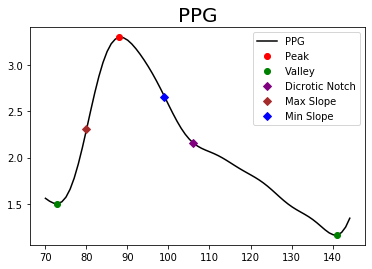

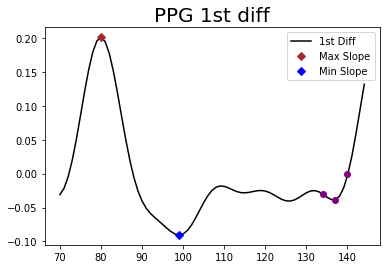

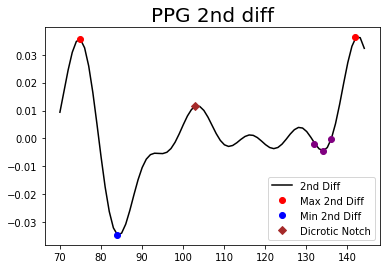

In [39]:
y = 13
Test = RearrangedData['ppg'][y]
t = np.linspace( 0 , len(Test) , len(Test) )

plt.plot( t[70:145] , Test[70:145] , color = 'black' , label = 'PPG' )
plt.plot( AttributeTable['systolicIndex'][y][1] , AttributeTable['systolicValue'][y][1]  , 'o' , color = 'red' , label = 'Peak' )
plt.plot( AttributeTable['valleyIndex0'][y][0:2] , AttributeTable['valleyValue0'][y][0:2]  , 'o' , color = 'green' , label = 'Valley' )
plt.plot( AttributeTable['DicroticIndex'][y][0]+3 , AttributeTable['DicroticValue'][y][0] , 'D' , color = 'purple' , label = 'Dicrotic Notch'  )
plt.plot( AttributeTable['maxSlopeIndex'][y][0] , AttributeTable['maxSlopeValue'][y][0] , 'D' , color = 'brown', label = 'Max Slope' )
plt.plot( AttributeTable['minSlopeIndex'][y][0] , AttributeTable['minSlopeValue'][y][0] , 'D' , color = 'blue' , label = 'Min Slope' )
plt.title( 'PPG' , fontsize = 20 , color = 'black')
plt.legend( loc = 'best' )
plt.show()




Test1 = RearrangedData['diff1ppg'][y]
t1 = np.linspace( 0 , len(Test1) , len(Test1) )

plt.plot( t1[70:145] , Test1[70:145] , color = 'black' , label = '1st Diff' )
plt.plot( AttributeTable['maxSlopeIndex'][y][0] , AttributeTable['peakValue1st'][y][0] , 'D' , color = 'brown' , label = 'Max Slope' )
plt.plot( AttributeTable['minSlopeIndex'][y][0] , AttributeTable['valleyValue1st'][y][0] , 'D', color = 'blue' ,  label = 'Min Slope' )
plt.legend( loc = 'best' )
plt.title( 'PPG 1st diff' , fontsize = 20 , color = 'black')

g = 137
plt.plot( g , Test1[g] , 'o' , color = "purple" , label = '1diffonset' )
plt.plot( g-3 , Test1[g-3] , 'o' , color = "purple" , label = '1diffonset' )
plt.plot( g+3 , Test1[g+3] , 'o' , color = "purple" , label = '1diffonset' )
plt.show()





Test2 = RearrangedData['diff2ppg'][y]
t2 = np.linspace( 0 , len(Test2) , len(Test2) )

plt.plot( t2[70:145] , Test2[70:145] , color = 'black' , label = '2nd Diff' )
plt.plot( AttributeTable['peaIndex2st'][y][0:2] , AttributeTable['peakValue2st'][y][0:2] , 'o' , color = 'red' , label = 'Max 2nd Diff' )
plt.plot( AttributeTable['valleyIndex2st'][y][0] , AttributeTable['valleyValue2st'][y][0] , 'o' , color = 'blue' , label = 'Min 2nd Diff' )
plt.plot( AttributeTable['DicroticIndex'][y][0] , AttributeTable['DicroticDiff2Value'][y][0] , 'D' , color = 'brown' , label = 'Dicrotic Notch' )
plt.legend( loc = 'best' )
plt.title( 'PPG 2nd diff' , fontsize = 20 , color = 'black')

f = 134
plt.plot( f , Test2[f] , 'o' , color = "purple" , label = '1diffonset' )
plt.plot( f-2 , Test2[f-2] , 'o' , color = "purple" , label = '1diffonset' )
plt.plot( f+2 , Test2[f+2] , 'o' , color = "purple" , label = '1diffonset' )
plt.show()

